In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error,mean_squared_error 
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("SMMOOD.csv")

In [3]:
df

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,500,27,Female,Snapchat,120,4.0,40.0,18.0,22.0,Neutral
1,488,21,Non-binary,Snapchat,60,1.0,18.0,7.0,12.0,Neutral
2,776,28,Non-binary,Snapchat,115,3.0,38.0,18.0,27.0,Anxiety
3,869,27,Male,Telegram,105,3.0,48.0,20.0,28.0,Anxiety
4,573,21,Non-binary,Facebook,55,3.0,17.0,7.0,12.0,Neutral
...,...,...,...,...,...,...,...,...,...,...
1096,996,33,Non-binary,Twitter,85,4.0,35.0,18.0,18.0,Boredom
1097,997,22,Female,Facebook,70,1.0,14.0,6.0,10.0,Neutral
1098,998,35,Male,Whatsapp,110,3.0,50.0,25.0,25.0,Happiness
1099,999,28,Non-binary,Telegram,60,2.0,18.0,8.0,18.0,Anger


In [4]:
df.dtypes

User_ID                         int64
Age                             int64
Gender                         object
Platform                       object
Daily_Usage_Time (minutes)      int64
Posts_Per_Day                 float64
Likes_Received_Per_Day        float64
Comments_Received_Per_Day     float64
Messages_Sent_Per_Day         float64
Dominant_Emotion               object
dtype: object

In [5]:
df.isna().any()

User_ID                       False
Age                           False
Gender                        False
Platform                      False
Daily_Usage_Time (minutes)    False
Posts_Per_Day                 False
Likes_Received_Per_Day        False
Comments_Received_Per_Day     False
Messages_Sent_Per_Day         False
Dominant_Emotion              False
dtype: bool

In [6]:
from sklearn.preprocessing import OneHotEncoder

In [7]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [8]:
encoded_array = encoder.fit_transform(df[['Platform']])

In [9]:
df_encoded = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['Platform']))

print(df_encoded)

      Platform_Facebook  Platform_Instagram  Platform_LinkedIn  \
0                   0.0                 0.0                0.0   
1                   0.0                 0.0                0.0   
2                   0.0                 0.0                0.0   
3                   0.0                 0.0                0.0   
4                   1.0                 0.0                0.0   
...                 ...                 ...                ...   
1096                0.0                 0.0                0.0   
1097                1.0                 0.0                0.0   
1098                0.0                 0.0                0.0   
1099                0.0                 0.0                0.0   
1100                0.0                 0.0                0.0   

      Platform_Snapchat  Platform_Telegram  Platform_Twitter  \
0                   1.0                0.0               0.0   
1                   1.0                0.0               0.0   
2              

In [10]:
df = pd.concat([df, df_encoded], axis=1)

In [11]:
df.drop(columns=['Platform'], inplace=True)

In [12]:
df

,User_ID,Age,Gender,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion,Platform_Facebook,Platform_Instagram,Platform_LinkedIn,Platform_Snapchat,Platform_Telegram,Platform_Twitter,Platform_Whatsapp
0,500,27,Female,120,4.0,40.0,18.0,22.0,Neutral,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,488,21,Non-binary,60,1.0,18.0,7.0,12.0,Neutral,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,776,28,Non-binary,115,3.0,38.0,18.0,27.0,Anxiety,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,869,27,Male,105,3.0,48.0,20.0,28.0,Anxiety,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,573,21,Non-binary,55,3.0,17.0,7.0,12.0,Neutral,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,996,33,Non-binary,85,4.0,35.0,18.0,18.0,Boredom,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1097,997,22,Female,70,1.0,14.0,6.0,10.0,Neutral,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1098,998,35,Male,110,3.0,50.0,25.0,25.0,Happiness,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1099,999,28,Non-binary,60,2.0,18.0,8.0,18.0,Anger,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [13]:
encoded_array1 = encoder.fit_transform(df[['Gender']])

In [14]:
df_encoded1 = pd.DataFrame(encoded_array1, columns=encoder.get_feature_names_out(['Gender']))

print(df_encoded1)

      Gender_Female  Gender_Male  Gender_Non-binary
0               1.0          0.0                0.0
1               0.0          0.0                1.0
2               0.0          0.0                1.0
3               0.0          1.0                0.0
4               0.0          0.0                1.0
...             ...          ...                ...
1096            0.0          0.0                1.0
1097            1.0          0.0                0.0
1098            0.0          1.0                0.0
1099            0.0          0.0                1.0
1100            1.0          0.0                0.0

[1101 rows x 3 columns]


In [15]:
df = pd.concat([df, df_encoded1], axis=1)
df.drop(columns=['Gender'], inplace=True)

In [16]:
df

,User_ID,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion,Platform_Facebook,Platform_Instagram,Platform_LinkedIn,Platform_Snapchat,Platform_Telegram,Platform_Twitter,Platform_Whatsapp,Gender_Female,Gender_Male,Gender_Non-binary
0,500,27,120,4.0,40.0,18.0,22.0,Neutral,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,488,21,60,1.0,18.0,7.0,12.0,Neutral,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,776,28,115,3.0,38.0,18.0,27.0,Anxiety,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,869,27,105,3.0,48.0,20.0,28.0,Anxiety,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,573,21,55,3.0,17.0,7.0,12.0,Neutral,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,996,33,85,4.0,35.0,18.0,18.0,Boredom,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1097,997,22,70,1.0,14.0,6.0,10.0,Neutral,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1098,998,35,110,3.0,50.0,25.0,25.0,Happiness,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1099,999,28,60,2.0,18.0,8.0,18.0,Anger,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [17]:
df.to_csv('SMMood_modified.csv')

## Knn model

In [19]:
x1 = df.drop('Dominant_Emotion', axis=1)  # Features
y1 = df['Dominant_Emotion'] # Target variable

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=1)

In [21]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [22]:
predicted = knn.predict(X_test)

In [23]:
print("Confusion Matrix:\n", confusion_matrix(y_test, predicted))

Confusion Matrix:
 [[ 8  6  0  1  4  8]
 [ 3 13 13  7  0  2]
 [ 0  4 16  0  5  0]
 [ 6  2  0 33  5  0]
 [10  5 10  3 19  3]
 [11  3  6  6  8  1]]


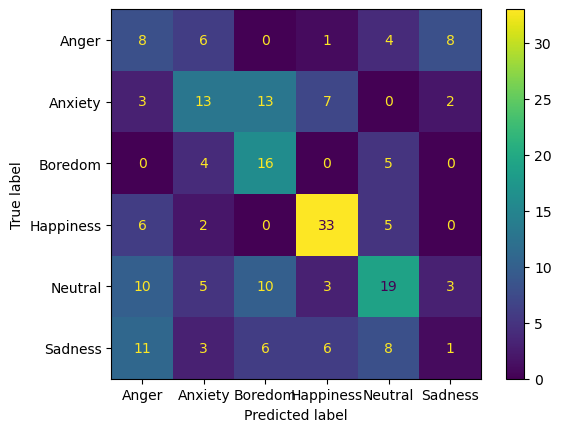

In [24]:
cm = confusion_matrix(y_test, predicted, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=knn.classes_)
disp.plot()
plt.show()

In [25]:
print("\nClassification Report:\n", classification_report(y_test, predicted, zero_division=0))


Classification Report:
               precision    recall  f1-score   support

       Anger       0.21      0.30      0.25        27
     Anxiety       0.39      0.34      0.37        38
     Boredom       0.36      0.64      0.46        25
   Happiness       0.66      0.72      0.69        46
     Neutral       0.46      0.38      0.42        50
     Sadness       0.07      0.03      0.04        35

    accuracy                           0.41       221
   macro avg       0.36      0.40      0.37       221
weighted avg       0.39      0.41      0.39       221



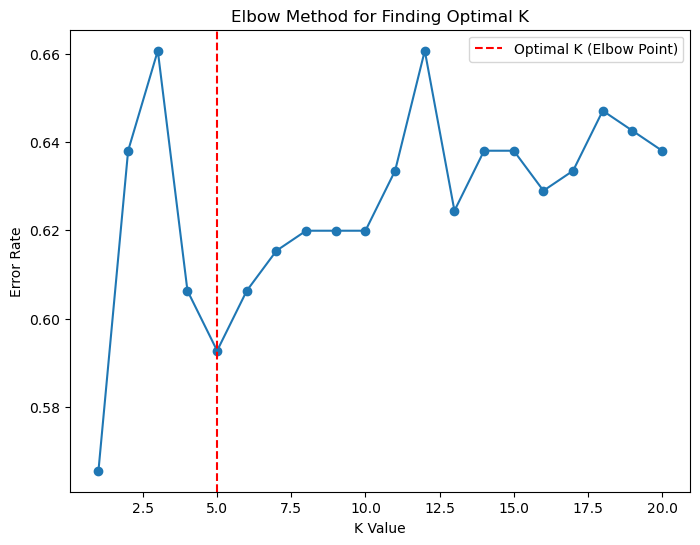

In [26]:
k_values = range(1, 21)
error_rates = []

for k in k_values:
    knn1 = KNeighborsClassifier(n_neighbors=k)
    knn1.fit(X_train, y_train)
    y_pred = knn1.predict(X_test)
    error_rate = 1 - accuracy_score(y_test, y_pred)
    error_rates.append(error_rate)

plt.figure(figsize=(8, 6))
plt.plot(k_values, error_rates, marker='o')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.title('Elbow Method for Finding Optimal K')
plt.axvline(x=5, linestyle='--', color='red', label="Optimal K (Elbow Point)")
plt.legend()
plt.show()

## Decision tree

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=15,
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=1)


In [30]:
fit = dt.fit(X_train, y_train)

In [31]:
y_pre = fit.predict(X_test)

In [32]:
cm = confusion_matrix(y_test, y_pre)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[24  1  1  0  0  1]
 [ 0 36  0  0  2  0]
 [ 0  0 24  0  0  1]
 [ 0  0  0 46  0  0]
 [ 0  0  0  0 49  1]
 [ 0  0  2  1  0 32]]


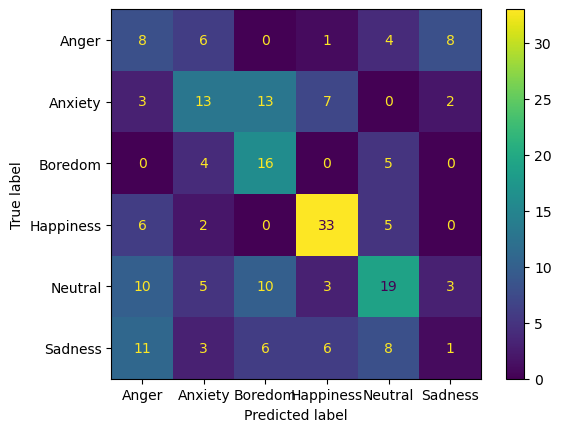

In [33]:
cm = confusion_matrix(y_test, predicted, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=dt.classes_)
disp.plot()
plt.show()

In [34]:
print("\nClassification Report:\n", classification_report(y_test, y_pre, zero_division=0))


Classification Report:
               precision    recall  f1-score   support

       Anger       1.00      0.89      0.94        27
     Anxiety       0.97      0.95      0.96        38
     Boredom       0.89      0.96      0.92        25
   Happiness       0.98      1.00      0.99        46
     Neutral       0.96      0.98      0.97        50
     Sadness       0.91      0.91      0.91        35

    accuracy                           0.95       221
   macro avg       0.95      0.95      0.95       221
weighted avg       0.96      0.95      0.95       221



In [35]:
param_grid = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy'],
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}


Make predictions for random people using the decision tree?


In [37]:
df

,User_ID,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion,Platform_Facebook,Platform_Instagram,Platform_LinkedIn,Platform_Snapchat,Platform_Telegram,Platform_Twitter,Platform_Whatsapp,Gender_Female,Gender_Male,Gender_Non-binary
0,500,27,120,4.0,40.0,18.0,22.0,Neutral,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,488,21,60,1.0,18.0,7.0,12.0,Neutral,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,776,28,115,3.0,38.0,18.0,27.0,Anxiety,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,869,27,105,3.0,48.0,20.0,28.0,Anxiety,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,573,21,55,3.0,17.0,7.0,12.0,Neutral,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,996,33,85,4.0,35.0,18.0,18.0,Boredom,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1097,997,22,70,1.0,14.0,6.0,10.0,Neutral,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1098,998,35,110,3.0,50.0,25.0,25.0,Happiness,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1099,999,28,60,2.0,18.0,8.0,18.0,Anger,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [38]:
df['User_ID'].min()

1

In [39]:
df['User_ID'].max()

1000

In [88]:
data = {
    "User_ID": [1001],  # Example user ID
    "Age": [25],  # Example age
    "Daily_Usage_Time (minutes)": [180],  # Example usage time
    "Posts_Per_Day": [3],  # Example number of posts
    "Likes_Received_Per_Day": [50],  # Example likes received
    "Comments_Received_Per_Day": [10],  # Example comments received
    "Messages_Sent_Per_Day": [30],  # Example messages sent
    "Platform_Facebook": [1],  # User active on Facebook
    "Platform_Instagram": [0],  # User active on Instagram
    "Platform_LinkedIn": [0],  # User not active on LinkedIn
    "Platform_Snapchat": [0],  # User not active on Snapchat
    "Platform_Telegram": [0],  # User active on Telegram
    "Platform_Twitter": [0],  # User not active on Twitter
    "Platform_Whatsapp": [0],  # User active on WhatsApp
    "Gender_Female": [0],  # Not female
    "Gender_Male": [1],  # Male
    "Gender_Non-binary": [0]  # Not non-binary
}

In [90]:
test_df = pd.DataFrame(data)

In [92]:
test_df

,User_ID,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Platform_Facebook,Platform_Instagram,Platform_LinkedIn,Platform_Snapchat,Platform_Telegram,Platform_Twitter,Platform_Whatsapp,Gender_Female,Gender_Male,Gender_Non-binary
0,1001,25,180,3,50,10,30,1,0,0,0,0,0,0,0,1,0


In [94]:
new_pred = fit.predict(test_df)
print('The model predicts this individuals dominate emotion will be:', new_pred)

The model predicts this individuals dominate emotion will be: ['Happiness']


In [96]:
knn_new = knn.predict(test_df)
print('The model predicts this individuals dominate emotion will be:', knn_new)

The model predicts this individuals dominate emotion will be: ['Happiness']


Feature engineering??